<a href="https://colab.research.google.com/github/ShivaniMareddy/Decision_Tree/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Social_Network_Ads.csv'
df=pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
x=df.iloc[:,2:4].values
y=df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=4)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_pred=classifier.predict(x_test)
print("Predictions:",y_pred)

Predictions: [1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0
 1 0 1 1 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9125


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           1       0.84      0.93      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n',cm)

Confusion Matrix:
 [[47  5]
 [ 2 26]]


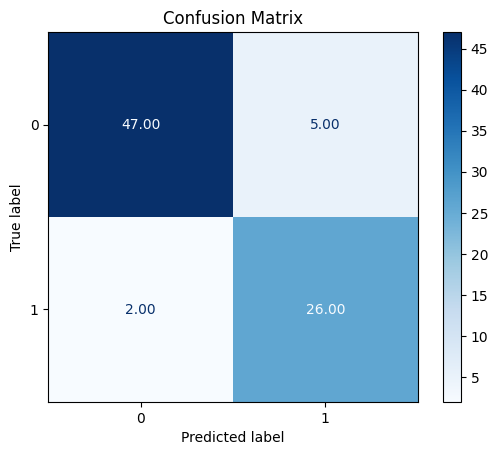

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Blues",values_format=".2f")
plt.title("Confusion Matrix")
plt.show()

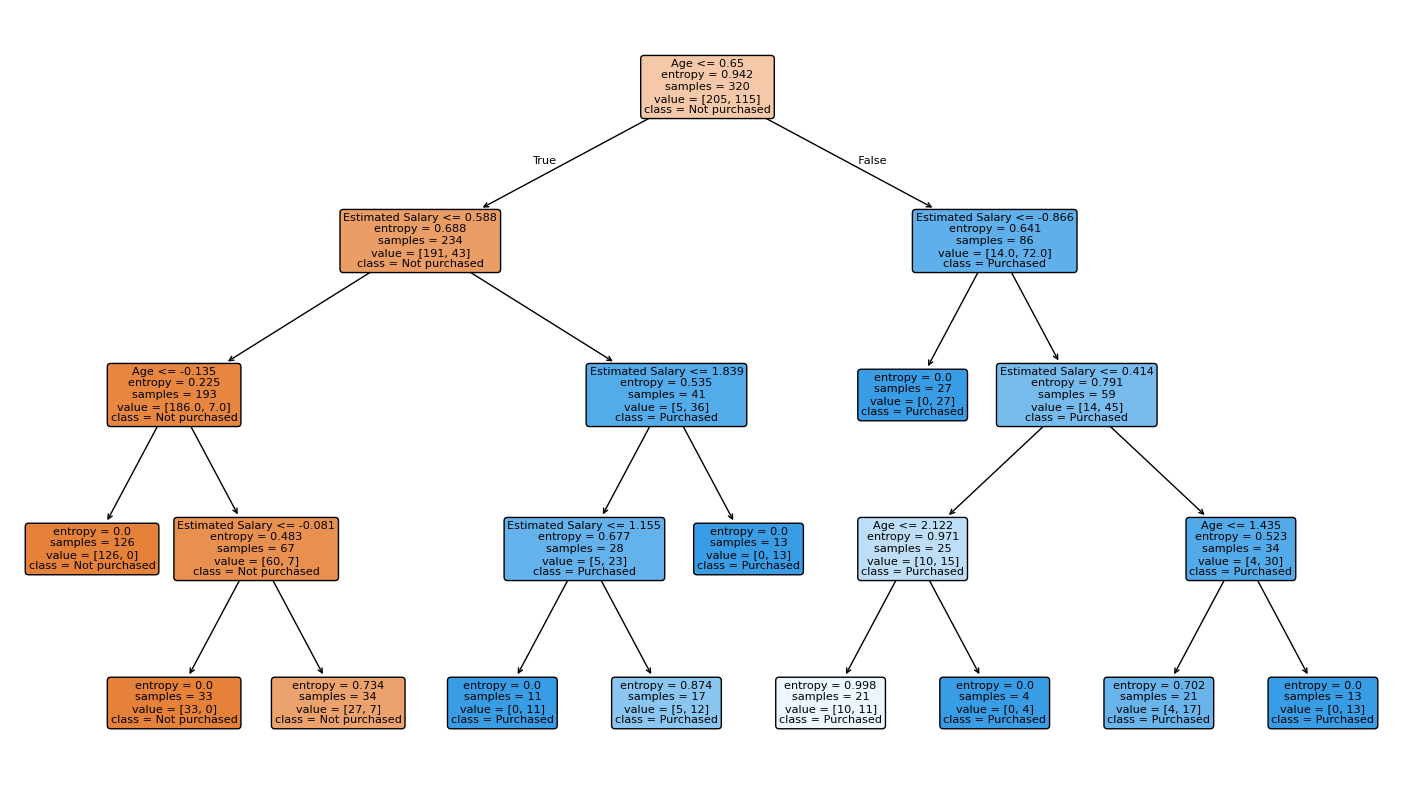

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plot_tree(
    classifier,
    feature_names=["Age","Estimated Salary"],
    class_names=["Not purchased","Purchased"],
    filled=True,
    rounded=True
)
plt.show()

Using Titanic Passenger data,our goal is to predict whether a passenger survived or not based on their details

In [ ]:
df=sns.load_dataset('titanic')
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [ ]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df['age'] = df['age'].fillna(df['age'].mean())


In [ ]:
df = df.drop(columns=['deck'])


In [ ]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])


In [ ]:
df=df[['survived', 'pclass', 'age', 'parch', 'fare','sex','embarked']]
df.head()

,survived,pclass,age,parch,fare,sex,embarked
0,0,3,22.0,0,7.2500,male,S
1,1,1,38.0,0,71.2833,female,C
2,1,3,26.0,0,7.9250,female,S
3,1,1,35.0,0,53.1000,female,S
4,0,3,35.0,0,8.0500,male,S


In [ ]:
df.isna().sum()

,0
survived,0
pclass,0
age,0
parch,0
fare,0
sex,0
embarked,0


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
df.columns

Index(['survived', 'pclass', 'age', 'parch', 'fare', 'sex', 'embarked'], dtype='object')

In [ ]:
encoder=LabelEncoder()
df["sex"]=encoder.fit_transform(df["sex"])
df["embarked"]=encoder.fit_transform(df["embarked"])

In [ ]:
x=df.drop("survived",axis=1)
y=df["survived"]
x.head(),y.head()

(   pclass   age  parch     fare  sex  embarked
 0       3  22.0      0   7.2500    1         2
 1       1  38.0      0  71.2833    0         0
 2       3  26.0      0   7.9250    0         2
 3       1  35.0      0  53.1000    0         2
 4       3  35.0      0   8.0500    1         2,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: survived, dtype: int64)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)
classifier.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [ ]:
y_pred=classifier.predict(x_test)
print("Predictions:",y_pred)

Predictions: [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.7988826815642458


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n',cm)

Confusion Matrix:
 [[92 13]
 [23 51]]


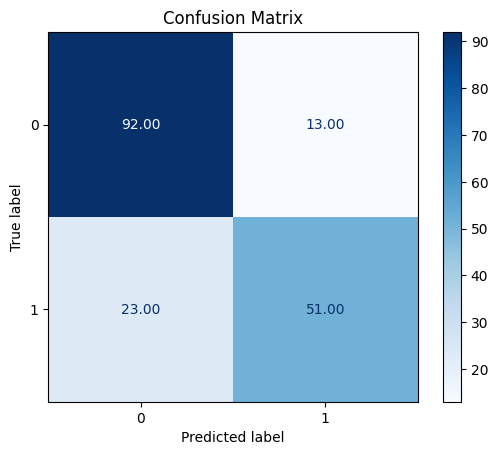

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Blues",values_format=".2f")
plt.title("Confusion Matrix")
plt.show()

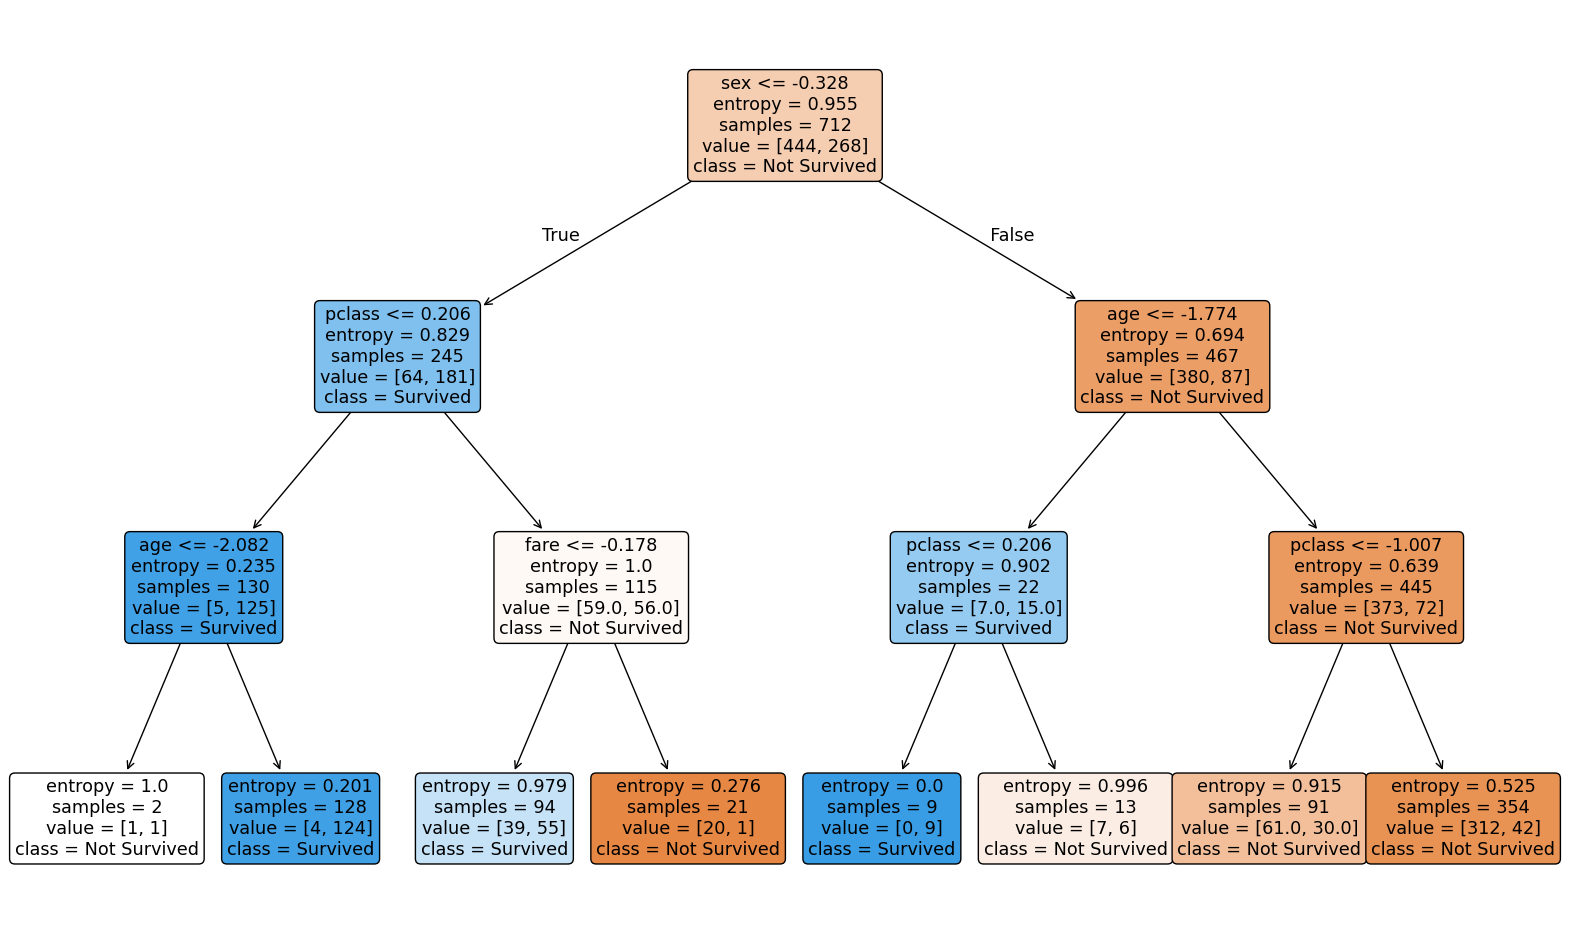

In [ ]:
import pandas as pd

x_train_df = pd.DataFrame(x_train, columns=['pclass', 'age', 'parch', 'fare', 'sex', 'embarked'])

plt.figure(figsize=(20, 12))
plot_tree(
    classifier,
    feature_names=x_train_df.columns,
    class_names=['Not Survived', 'Survived'],
    filled=True,
    rounded=True
)
plt.show()
